# Rainfall Weather Forecasting is a classification Model

In [1]:
print(('*'*127))
print("                                                      Rainfall Weather Forecasting                                                                 ")
print(('*'*127))

*******************************************************************************************************************************
                                                      Rainfall Weather Forecasting                                                                 
*******************************************************************************************************************************


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn


from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 24)


df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.shape

(8425, 23)

* Here we that there is 8425 Rows and 23 Columns for this Dataset

In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

* Here we observe that majority of the Columns are of float-type and RainTomorrow is our Target variable

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

* Since here we find many missing values missing value treatment is required

In [6]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [7]:
df['WindGustDir'].value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [8]:
df['WindDir9am'].value_counts()

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

In [9]:
df['WindDir3pm'].value_counts()

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

In [10]:
df['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [11]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

# Data Cleaning

# Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()


df["RainTomorrow"] = lb.fit_transform(df["RainTomorrow"])

In [13]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

# Missing Value Treatment

In [14]:
df['RainTomorrow']=df['RainTomorrow'].fillna(np.mean(df['RainTomorrow'])) 
df['RainToday']=df['RainToday'].fillna(np.mean(df['RainToday'])) 
df['Temp3pm']=df['Temp3pm'].fillna(np.mean(df['Temp3pm'])) 
df['Temp9am']=df['Temp9am'].fillna(np.mean(df['Temp9am']))
df['Cloud3pm']=df['Cloud3pm'].fillna(np.mean(df['Cloud3pm']))
df['Cloud9am']=df['Cloud9am'].fillna(np.mean(df['Cloud9am']))
df['Pressure3pm']=df['Pressure3pm'].fillna(np.mean(df['Pressure3pm']))
df['Pressure9am']=df['Pressure9am'].fillna(np.mean(df['Pressure9am']))
df['Humidity3pm']=df['Humidity3pm'].fillna(np.mean(df['Humidity3pm']))
df['Humidity9am']=df['Humidity9am'].fillna(np.mean(df['Humidity9am']))
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(np.mean(df['WindSpeed3pm']))
df['WindSpeed9am']=df['WindSpeed9am'].fillna(np.mean(df['WindSpeed9am']))
df['WindDir3pm']=df['WindDir3pm'].fillna(np.mean(df['WindDir3pm']))
df['WindDir9am']=df['WindDir9am'].fillna(np.mean(df['WindDir9am']))
df['WindGustSpeed']=df['WindGustSpeed'].fillna(np.mean(df['WindGustSpeed']))
df['WindGustDir']=df['WindGustDir'].fillna(np.mean(df['WindGustDir']))
df['Sunshine']=df['Sunshine'].fillna(np.mean(df['Sunshine']))
df['Evaporation']=df['Evaporation'].fillna(np.mean(df['Evaporation']))
df['Rainfall']=df['Rainfall'].fillna(np.mean(df['Rainfall']))
df['MaxTemp']=df['MaxTemp'].fillna(np.mean(df['MaxTemp']))
df['MinTemp']=df['MinTemp'].fillna(np.mean(df['MinTemp']))

# Checking VIF ( Variance Inflation Factor )

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif=pd.DataFrame()
    vif["F"] = df.columns
    vif["VIF_Value"] = [variance_inflation_factor(df.values, i)for i in range(df.shape[1])]
    return(vif)

F=df.iloc[:,:-1]
F.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.0,1.0,13.4,22.9,0.6,5.389395,7.632205,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0
1,1.0,1.0,7.4,25.1,0.0,5.389395,7.632205,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0
2,2.0,1.0,12.9,25.7,0.0,5.389395,7.632205,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0
3,3.0,1.0,9.2,28.0,0.0,5.389395,7.632205,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0
4,4.0,1.0,17.5,32.3,1.0,5.389395,7.632205,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0


In [16]:
calculate_vif(F)

,F,VIF_Value
0,Date,4.865781
1,Location,6.645995
2,MinTemp,58.020192
3,MaxTemp,425.913732
4,Rainfall,1.411976
5,Evaporation,3.557625
6,Sunshine,15.181350
7,WindGustDir,6.672797
8,WindGustSpeed,20.529045
9,WindDir9am,5.584596


* Here we observe that Pressure3pm, Pressure9am, MaxTemp, Temp3pm have High Correlation and Must be checked for Correlation

In [17]:
df.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.475037,0.016931,0.102409,0.004945,0.153853,0.065101,0.002610,-0.037361,0.024279,-0.009079,-0.083943,-0.046362,0.086328,-0.038345,0.030809,0.013545,0.005237,-0.010572,0.070703,0.113734,-0.006325,0.027384
Location,0.475037,1.000000,0.116531,0.064268,0.007693,0.143519,0.057817,-0.021180,0.231396,-0.050449,-0.028042,0.221378,0.231801,0.005662,0.055790,-0.032261,-0.020574,0.038019,0.017561,0.118051,0.060570,0.007068,0.028247
MinTemp,0.016931,0.116531,1.000000,0.717522,0.087684,0.254965,0.056184,-0.156861,0.230058,-0.088101,-0.144033,0.136872,0.178349,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520,0.069043,0.107930
MaxTemp,0.102409,0.064268,0.717522,1.000000,-0.087451,0.322405,0.378403,-0.236762,0.139998,-0.245924,-0.177394,0.013314,0.088172,-0.390976,-0.421879,-0.325721,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.225172,-0.115563
Rainfall,0.004945,0.007693,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.049958,0.086000,0.095107,0.037966,0.050631,0.024791,0.228800,0.235444,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.463211,0.183200
Evaporation,0.153853,0.143519,0.254965,0.322405,0.023517,1.000000,0.226001,-0.072234,0.136371,-0.058219,-0.047889,0.104294,0.101126,-0.213108,-0.161661,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.091700,-0.061642
Sunshine,0.065101,0.057817,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.109562,-0.013778,-0.083901,-0.067804,-0.018069,0.030145,-0.360831,-0.440268,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.239821,-0.311567
WindGustDir,0.002610,-0.021180,-0.156861,-0.236762,0.049958,-0.072234,-0.109562,1.000000,0.017559,0.404709,0.542701,-0.050563,0.044635,0.068504,0.079594,-0.119318,-0.031475,0.108390,0.088982,-0.187304,-0.250847,0.135286,0.057037
WindGustSpeed,-0.037361,0.231396,0.230058,0.139998,0.086000,0.136371,-0.013778,0.017559,1.000000,-0.124473,0.073409,0.600198,0.634939,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199,0.082540,0.189829
WindDir9am,0.024279,-0.050449,-0.088101,-0.245924,0.095107,-0.058219,-0.083901,0.404709,-0.124473,1.000000,0.266336,-0.075314,-0.034768,0.102930,0.151840,0.010917,0.097374,0.114581,0.068183,-0.156612,-0.250499,0.167754,0.031804


* Since Pressure9am	, Pressure3pm have very high correlation values we remove them and between Temp3pm and Maxtemp we remove Temp3pm because Maxtemp has better correlation with target column also since we remove Temp3pm and Temp 9am too has high variance we remove it


In [18]:
df.drop(columns=['Pressure9am', 'Pressure3pm', 'Temp3pm', 'Temp9am'],axis=1,inplace=True)

# Outlier Check and Removal

In [19]:
df1 = df[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']]

In [20]:
df2 = df[['Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow','WindGustDir', 'WindGustSpeed']]

In [21]:
df3 = df[['WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm']]

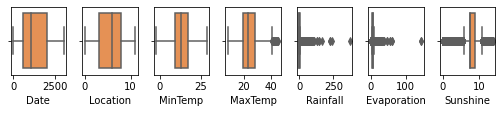

In [22]:
Columns = df1.columns.values
ncolumns = 20
nrows = 10
plt.figure(figsize=[20,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df1[Columns[i]], color='green', orient='H', palette='Oranges_r')
    plt.tight_layout()

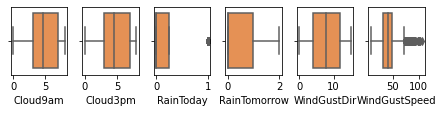

In [23]:
Columns = df2.columns.values
ncolumns = 20
nrows = 10
plt.figure(figsize=[20,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df2[Columns[i]], color='green', orient='H', palette='Oranges_r')
    plt.tight_layout()

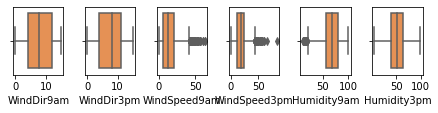

In [24]:
Columns = df3.columns.values
ncolumns = 20
nrows = 10
plt.figure(figsize=[20,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df3[Columns[i]], color='green', orient='H', palette='Oranges_r')
    plt.tight_layout()

In [25]:
from scipy.stats import zscore
import numpy as np
Z = np.abs(zscore(df))
Z.shape

(8425, 19)

In [26]:
threshold = 3
print(np.where(Z>3))
new_df = df[(Z<3).all(axis=1)]

(array([  14,   44,   52,   52,   60,   61,   62,   62,   68,  123,  267,
        283,  381,  381,  407,  431,  435,  437,  443,  452,  455,  462,
        464,  563,  611,  699,  713,  770,  796,  797,  802,  928,  928,
        935,  949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148,
       1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411,
       1412, 1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665,
       1673, 1680, 1774, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1819,
       1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063, 2068, 2074, 2108,
       2116, 2163, 2164, 2165, 2166, 2186, 2198, 2199, 2201, 2219, 2219,
       2230, 2231, 2265, 2429, 2459, 2488, 2500, 2505, 2505, 2527, 2541,
       2593, 2676, 2677, 2678, 2735, 2824, 2825, 2827, 2835, 2838, 2839,
       2845, 2846, 2847, 2849, 2849, 2855, 2863, 2869, 2877, 2883, 2890,
       2891, 2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933,
       2939, 2947, 2953, 2961, 2967, 2971, 2972, 2

In [27]:
new_df.shape

(7821, 19)

# DataLoss %

In [28]:
Loss = (8425/7821)/8425*100

In [29]:
Loss

0.012786088735455826

* Here we observe a Datasloss of 0.01% after the Outlier check adnd removal

In [30]:
new_df['Location'].value_counts()

5.0     1406
8.0     1183
10.0    1036
1.0      879
6.0      782
3.0      584
2.0      565
7.0      470
11.0     444
4.0      246
0.0      188
9.0       38
Name: Location, dtype: int64

In [31]:
new_df['WindGustDir'].value_counts()

7.780065     908
3.000000     628
10.000000    542
12.000000    538
0.000000     534
8.000000     527
14.000000    481
13.000000    479
15.000000    470
9.000000     451
1.000000     389
11.000000    374
4.000000     337
7.000000     335
5.000000     326
2.000000     287
6.000000     215
Name: WindGustDir, dtype: int64

In [32]:
new_df['WindDir9am'].value_counts()

7.733149     793
3.000000     778
12.000000    656
7.000000     578
9.000000     482
15.000000    480
11.000000    440
14.000000    428
1.000000     423
5.000000     404
13.000000    394
4.000000     388
8.000000     371
0.000000     362
10.000000    352
6.000000     256
2.000000     236
Name: WindDir9am, dtype: int64

In [33]:
new_df['WindDir3pm'].value_counts()

9.000000     773
8.000000     684
10.000000    588
15.000000    535
4.000000     528
12.000000    469
3.000000     459
14.000000    439
2.000000     431
13.000000    430
0.000000     427
7.000000     423
1.000000     387
5.000000     349
11.000000    334
6.000000     285
7.765307     280
Name: WindDir3pm, dtype: int64

In [34]:
new_df['RainToday'].value_counts()

0.000000    5919
1.000000    1799
0.243128     103
Name: RainToday, dtype: int64

In [35]:
new_df['RainTomorrow'].value_counts()

0    5982
1    1839
Name: RainTomorrow, dtype: int64

# EDA

# Univariate Analysis

<AxesSubplot:xlabel='Date', ylabel='Density'>

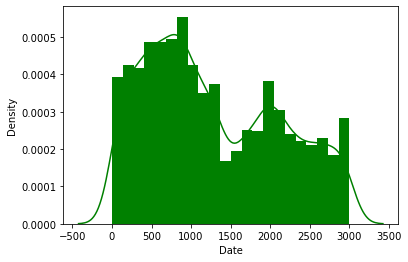

In [36]:
sn.distplot(new_df["Date"], hist_kws={'alpha':1}, color='g')

* Here we observe a good  distribution of data

<AxesSubplot:xlabel='Location', ylabel='Density'>

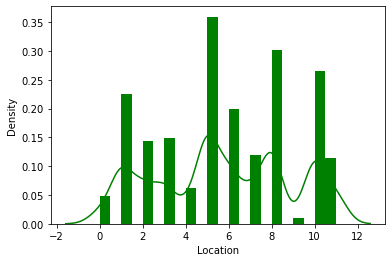

In [37]:
sn.distplot(new_df["Location"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

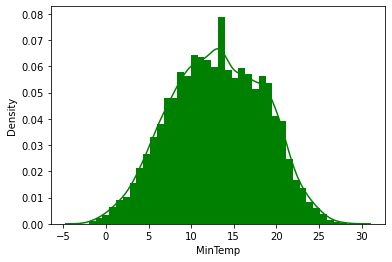

In [38]:
sn.distplot(new_df["MinTemp"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

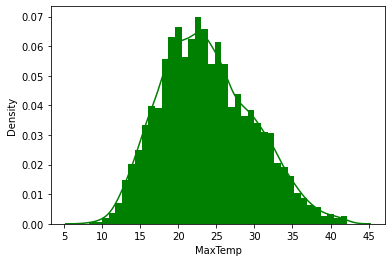

In [39]:
sn.distplot(new_df["MaxTemp"], hist_kws={'alpha':1}, color='g')

* Here we observe a good  distribution of data

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

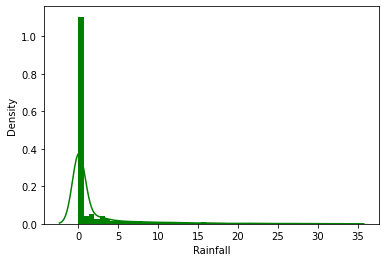

In [40]:
sn.distplot(new_df["Rainfall"], hist_kws={'alpha':1}, color='g')

* Here we observe highly skewed  distribution of data

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

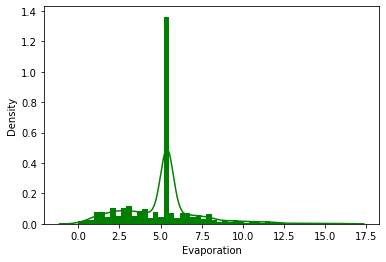

In [41]:
sn.distplot(new_df["Evaporation"], hist_kws={'alpha':1}, color='g')

* Here we observe moderately skewed  distribution of data

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

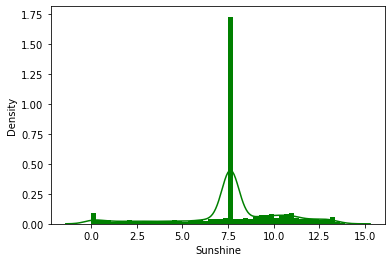

In [42]:
sn.distplot(new_df["Sunshine"], hist_kws={'alpha':1}, color='g')

* Here we observe moderately skewed  negative distribution of data

<AxesSubplot:xlabel='WindGustDir', ylabel='Density'>

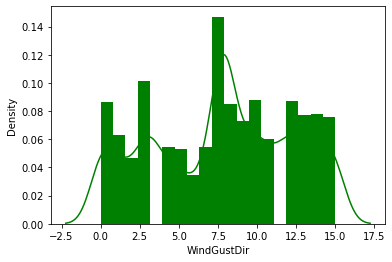

In [43]:
sn.distplot(new_df["WindGustDir"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

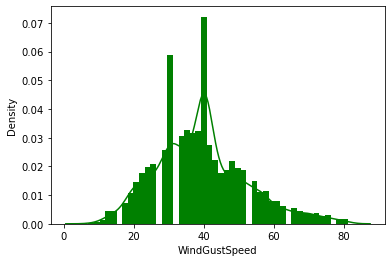

In [44]:
sn.distplot(new_df["WindGustSpeed"], hist_kws={'alpha':1}, color='g')

* Here we observe a good  distribution of data

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

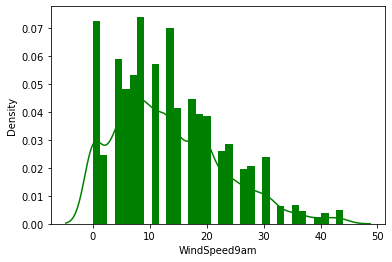

In [45]:
sn.distplot(new_df["WindSpeed9am"], hist_kws={'alpha':1}, color='g')

* Here we observe moderately skewed  distribution of data

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

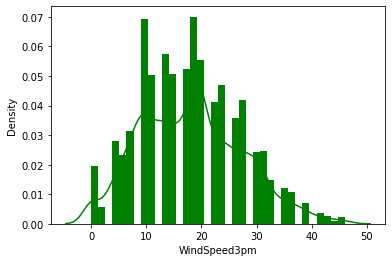

In [46]:
sn.distplot(new_df["WindSpeed3pm"], hist_kws={'alpha':1}, color='g')

* Here we observe a good  distribution of data

<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

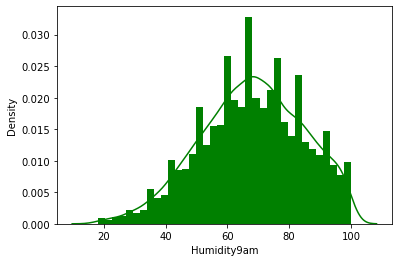

In [47]:
sn.distplot(new_df["Humidity9am"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

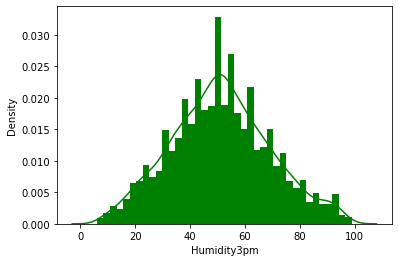

In [48]:
sn.distplot(new_df["Humidity3pm"], hist_kws={'alpha':1}, color='g')

* Here we observe a good  distribution of data

<AxesSubplot:xlabel='Cloud9am', ylabel='Density'>

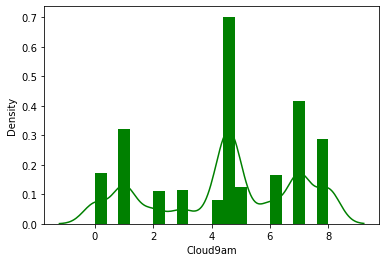

In [49]:
sn.distplot(new_df["Cloud9am"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Cloud3pm', ylabel='Density'>

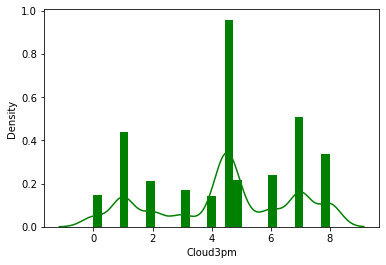

In [50]:
sn.distplot(new_df["Cloud3pm"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='RainToday', ylabel='Density'>

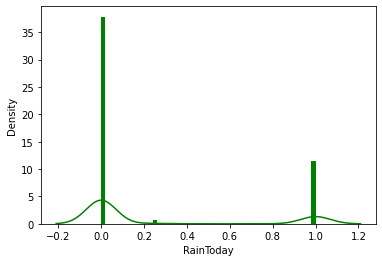

In [51]:
sn.distplot(new_df["RainToday"], hist_kws={'alpha':1}, color='g')

* Here we observe highly skewed  distribution of data

<AxesSubplot:xlabel='RainTomorrow', ylabel='Density'>

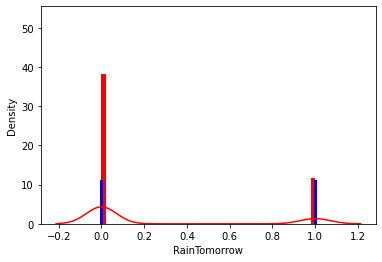

In [52]:
sn.distplot(new_df["RainTomorrow"], hist_kws={'alpha':1}, color='r', rug=True, rug_kws={"color": "b", "alpha": 0.5, "linewidth": 3, "height":0.2})

* Here we observe highly skewed  distribution of data

# Scatterplot

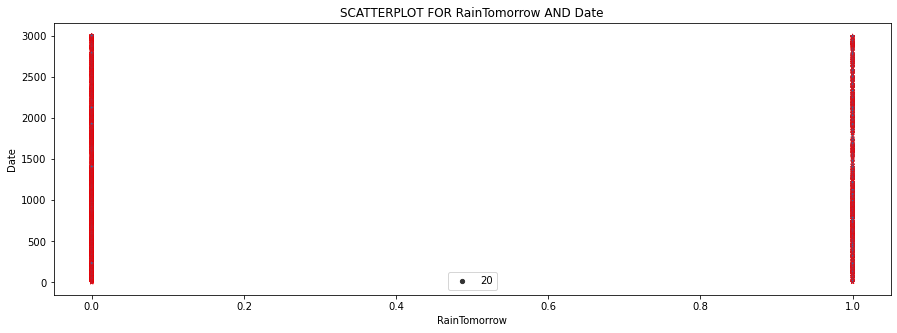

In [53]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Date')

sn.scatterplot(new_df['RainTomorrow'], new_df['Date'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe almost equal scattered data for both RainTomorrow report for all customerID Data

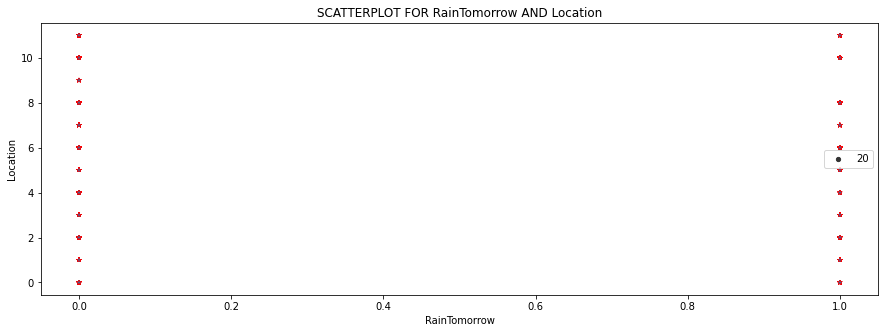

In [54]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Location')

sn.scatterplot(new_df['RainTomorrow'], new_df['Location'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all customerID Data

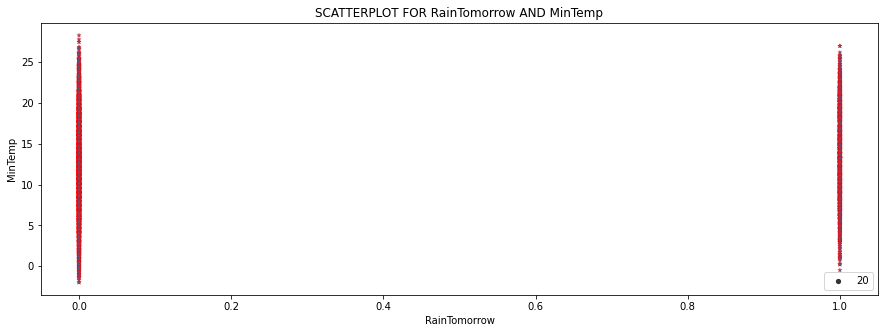

In [55]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND MinTemp')

sn.scatterplot(new_df['RainTomorrow'], new_df['MinTemp'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all MinTemp Data

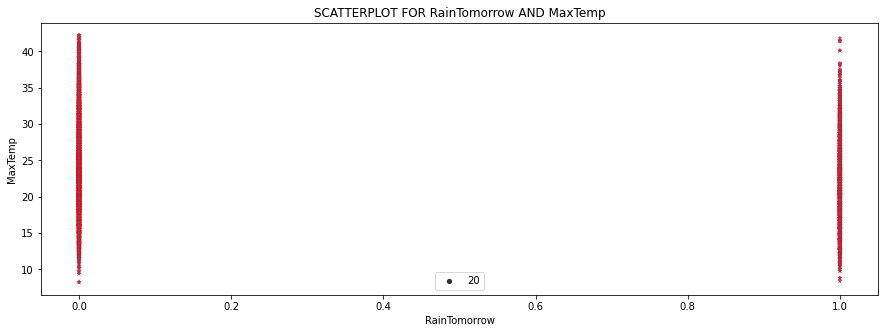

In [56]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND MaxTemp')

sn.scatterplot(new_df['RainTomorrow'], new_df['MaxTemp'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all MaxTemp Data

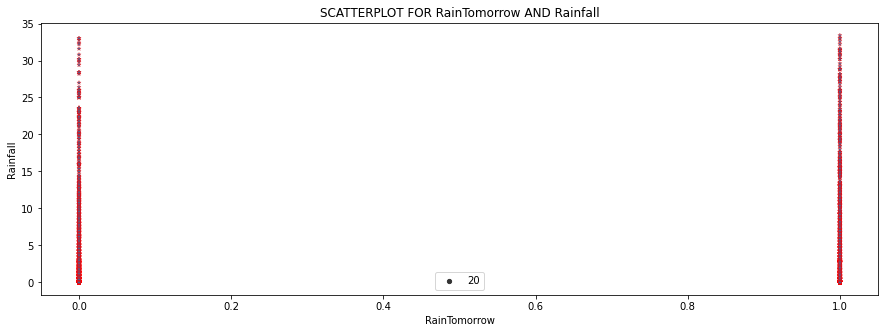

In [57]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Rainfall')

sn.scatterplot(new_df['RainTomorrow'], new_df['Rainfall'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for Yes RainTomorrow report for all Rainfall Data

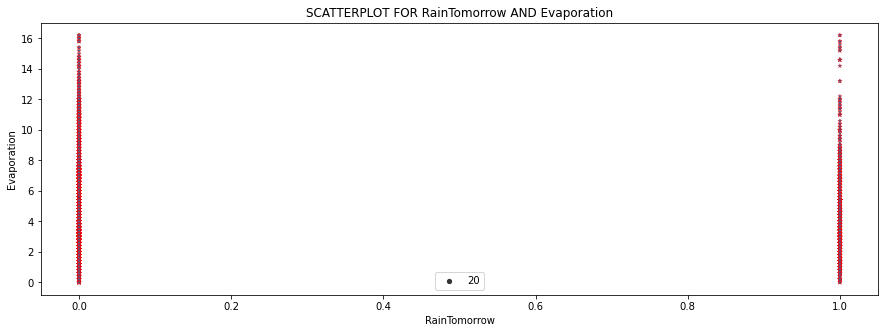

In [58]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Evaporation')

sn.scatterplot(new_df['RainTomorrow'], new_df['Evaporation'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all Evaporation Data

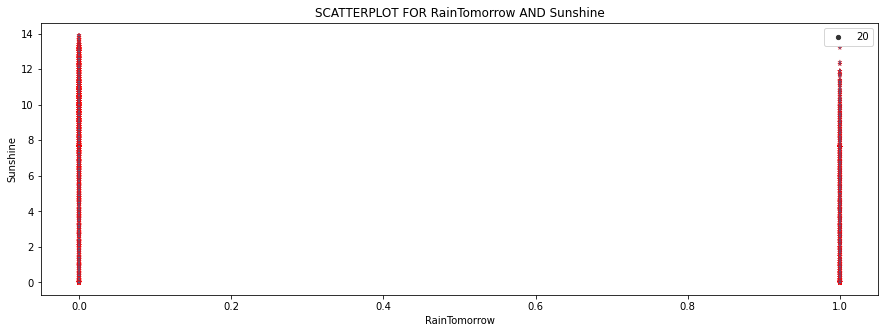

In [59]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Sunshine')

sn.scatterplot(new_df['RainTomorrow'], new_df['Sunshine'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all Sunshine Data

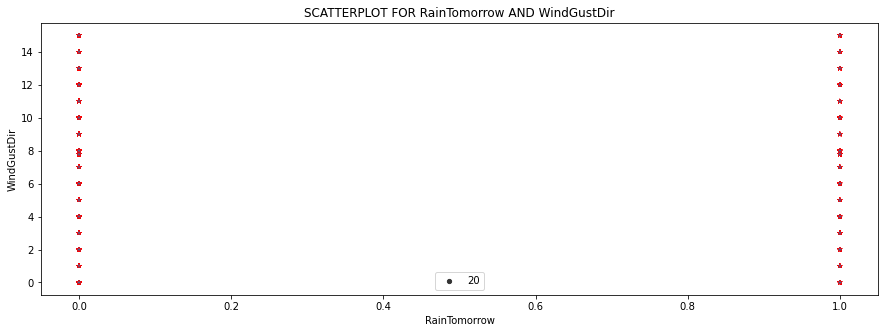

In [60]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND WindGustDir')

sn.scatterplot(new_df['RainTomorrow'], new_df['WindGustDir'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both RainTomorrow report for all WindGustDir Data

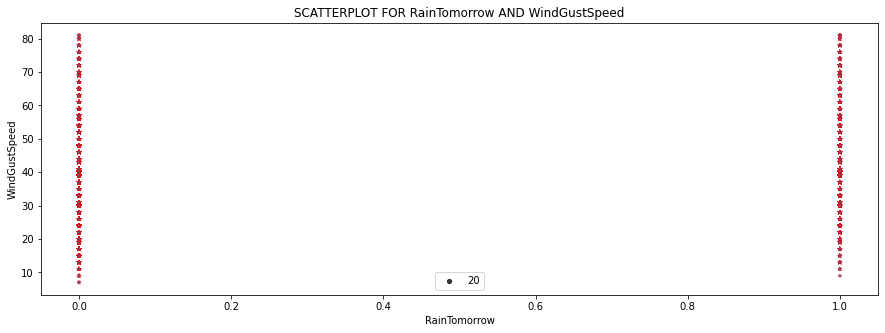

In [61]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND WindGustSpeed')

sn.scatterplot(new_df['RainTomorrow'], new_df['WindGustSpeed'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both RainTomorrow report for all WindGustSpeed Data

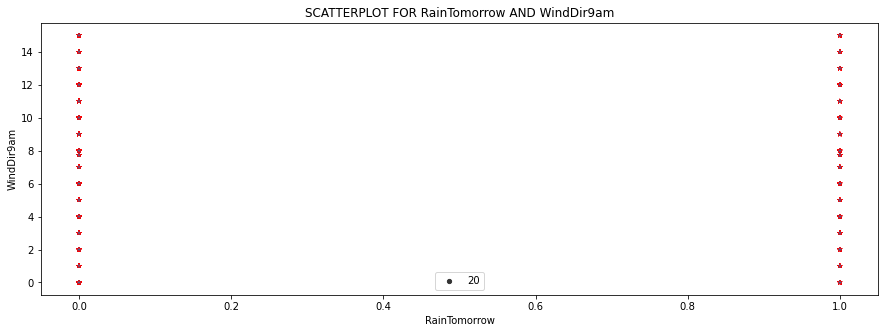

In [62]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND WindDir9am')

sn.scatterplot(new_df['RainTomorrow'], new_df['WindDir9am'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both RainTomorrow report for all WindDir9am Data

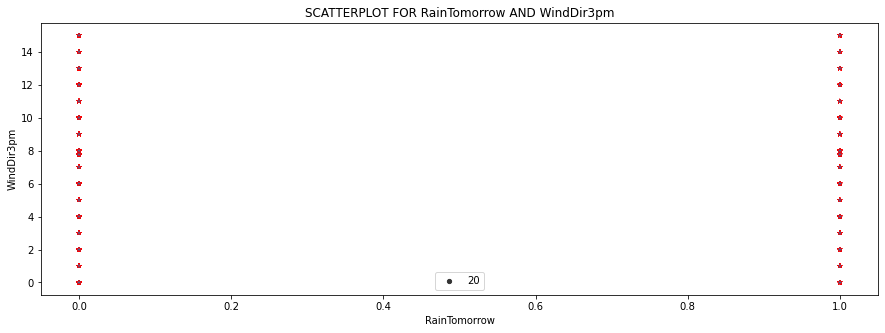

In [63]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND WindDir3pm')

sn.scatterplot(new_df['RainTomorrow'], new_df['WindDir3pm'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both RainTomorrow report for all WindDir3pm Data

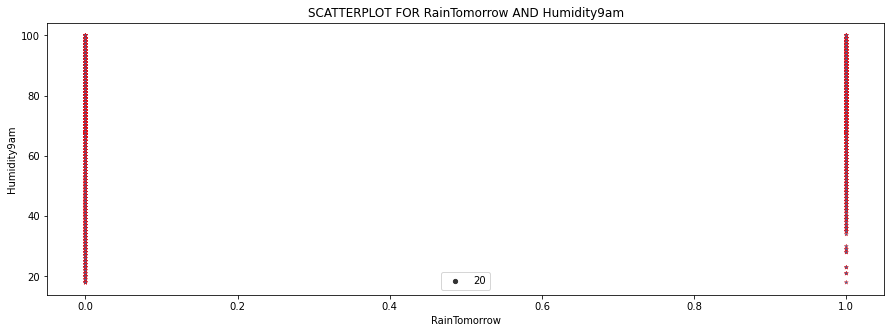

In [64]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Humidity9am')

sn.scatterplot(new_df['RainTomorrow'], new_df['Humidity9am'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all Humidity9am Data

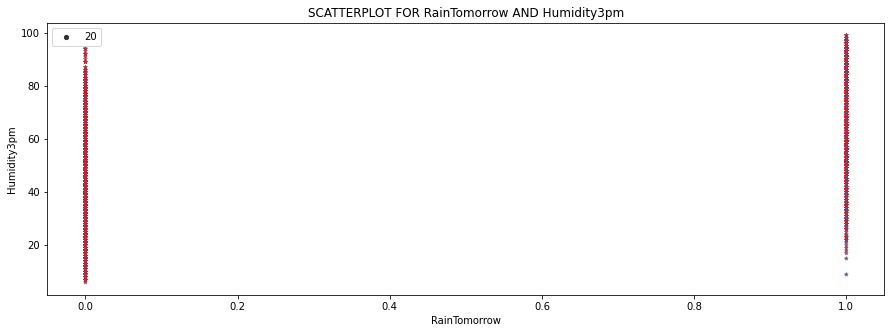

In [65]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Humidity3pm')

sn.scatterplot(new_df['RainTomorrow'], new_df['Humidity3pm'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all Humidity3pm Data

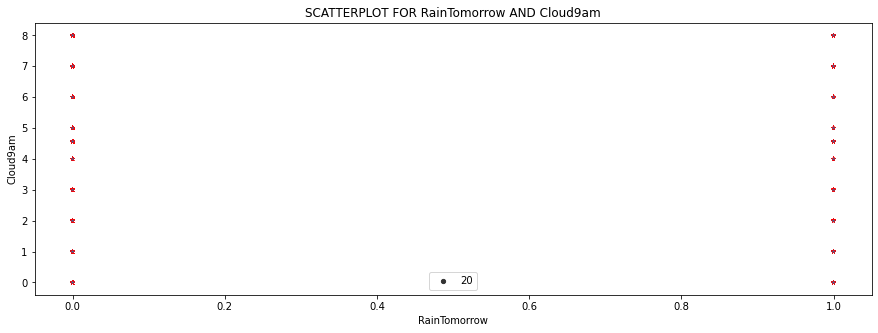

In [66]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Cloud9am')

sn.scatterplot(new_df['RainTomorrow'], new_df['Cloud9am'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all Cloud9am Data

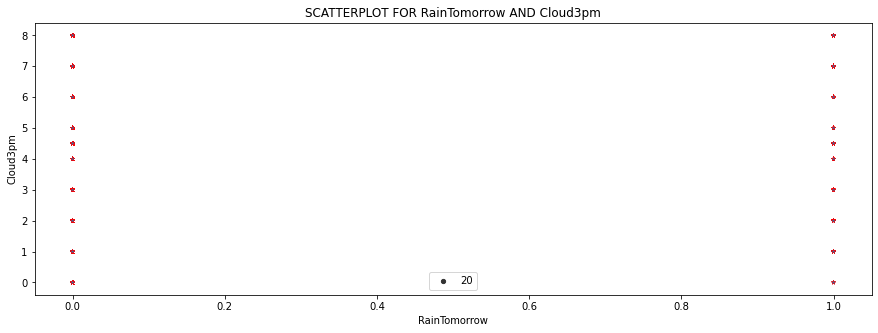

In [67]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND Cloud3pm')

sn.scatterplot(new_df['RainTomorrow'], new_df['Cloud3pm'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe slightly scattered data for No RainTomorrow report for all Cloud3pm Data

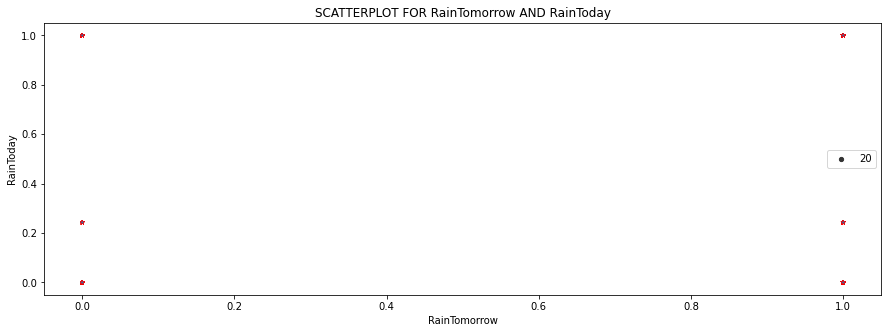

In [68]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR RainTomorrow AND RainToday')

sn.scatterplot(new_df['RainTomorrow'], new_df['RainToday'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both RainTomorrow report for all RainToday Data